<a href="https://colab.research.google.com/github/MouseLand/cellpose/blob/main/notebooks/test_Cellpose-SAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cellpose-SAM: superhuman generalization for cellular segmentation

Marius Pachitariu, Michael Rariden, Carsen Stringer

[paper](https://www.biorxiv.org/content/10.1101/2025.04.28.651001v1) | [code](https://github.com/MouseLand/cellpose)

This notebook explains processing example 2D and 3D images using the Cellpose package on Google Colab using the GPU.

### Make sure you have GPU access enabled by going to Runtime -> Change Runtime Type -> Hardware accelerator and selecting GPU

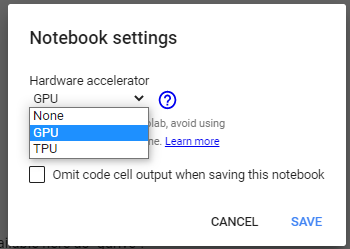

### Install Cellpose-SAM

In [1]:
!pip install git+https://www.github.com/mouseland/cellpose.git

  Cloning https://www.github.com/mouseland/cellpose.git to /private/var/folders/5t/3zkcp0dd27s3txcmjn8jl96m0000gq/T/pip-req-build-hurzyer1
  Running command git clone --filter=blob:none --quiet https://www.github.com/mouseland/cellpose.git /private/var/folders/5t/3zkcp0dd27s3txcmjn8jl96m0000gq/T/pip-req-build-hurzyer1


  Resolved https://www.github.com/mouseland/cellpose.git to commit 15eb3c6831ac19e0948dbc38c11016d11d1aacf3


  Preparing metadata (setup.py) ... -

 \

 |

 done


Check GPU and instantiate model - will download weights.

In [2]:
import numpy as np
from cellpose import models, core, io, plot
from pathlib import Path
from tqdm import trange
import matplotlib.pyplot as plt

io.logger_setup() # run this to get printing of progress

#Check if colab notebook instance has GPU access
if core.use_gpu()==False:
  raise ImportError("No GPU access, change your runtime")

model = models.CellposeModel(gpu=True)



Welcome to CellposeSAM, cellpose v
cellpose version: 	4.0.5.dev23+g15eb3c6 
platform:       	darwin 
python version: 	3.13.0 
torch version:  	2.7.1! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 




2025-06-17 19:27:55,946 [INFO] WRITING LOG OUTPUT TO /Users/ranit/.cellpose/run.log


2025-06-17 19:27:55,946 [INFO] 
cellpose version: 	4.0.5.dev23+g15eb3c6 
platform:       	darwin 
python version: 	3.13.0 
torch version:  	2.7.1


2025-06-17 19:27:55,972 [INFO] ** TORCH MPS version installed and working. **


2025-06-17 19:27:55,973 [INFO] ** TORCH MPS version installed and working. **


2025-06-17 19:27:55,973 [INFO] >>>> using GPU (MPS)


2025-06-17 19:27:57,394 [INFO] Downloading: "https://huggingface.co/mouseland/cellpose-sam/resolve/main/cpsam" to /Users/ranit/.cellpose/models/cpsam



  0%|                                                                                                                                | 0.00/1.15G [00:00<?, ?B/s]

  0%|▏                                                                                                                      | 1.48M/1.15G [00:00<01:19, 15.5MB/s]

  0%|▎                                                                                                                      | 3.43M/1.15G [00:00<01:07, 18.3MB/s]

  0%|▌                                                                                                                      | 5.62M/1.15G [00:00<01:00, 20.4MB/s]

  1%|▊                                                                                                                      | 7.56M/1.15G [00:00<01:01, 20.0MB/s]

  1%|█                                                                                                                      | 10.1M/1.15G [00:00<00:54, 22.2MB/s]

  1%|█▎                                                                                                                     | 12.6M/1.15G [00:00<00:51, 23.5MB/s]

  1%|█▌                                                                                                                     | 15.5M/1.15G [00:00<00:47, 25.7MB/s]

  2%|█▊                                                                                                                     | 18.0M/1.15G [00:00<00:46, 26.0MB/s]

  2%|██                                                                                                                     | 20.5M/1.15G [00:00<00:47, 25.4MB/s]

  2%|██▎                                                                                                                    | 23.0M/1.15G [00:01<00:55, 21.9MB/s]

  2%|██▋                                                                                                                    | 27.2M/1.15G [00:01<00:43, 27.8MB/s]

  3%|███                                                                                                                    | 30.1M/1.15G [00:01<00:42, 28.5MB/s]

  3%|███▎                                                                                                                   | 33.1M/1.15G [00:01<00:41, 29.1MB/s]

  3%|███▋                                                                                                                   | 35.9M/1.15G [00:01<00:41, 29.1MB/s]

  3%|███▉                                                                                                                   | 38.7M/1.15G [00:01<00:42, 28.2MB/s]

  4%|████▏                                                                                                                  | 41.5M/1.15G [00:01<00:52, 22.7MB/s]

  4%|████▌                                                                                                                  | 45.3M/1.15G [00:01<00:44, 26.8MB/s]

  4%|████▊                                                                                                                  | 48.0M/1.15G [00:01<00:44, 26.8MB/s]

  4%|█████▏                                                                                                                 | 50.7M/1.15G [00:02<00:49, 23.7MB/s]

  5%|█████▌                                                                                                                 | 54.8M/1.15G [00:02<00:41, 28.4MB/s]

  5%|█████▊                                                                                                                 | 57.7M/1.15G [00:02<00:41, 28.4MB/s]

  5%|██████                                                                                                                 | 60.5M/1.15G [00:02<00:43, 27.1MB/s]

  5%|██████▍                                                                                                                | 63.3M/1.15G [00:02<00:42, 27.5MB/s]

  6%|██████▋                                                                                                                | 66.0M/1.15G [00:02<00:43, 26.7MB/s]

  6%|██████▉                                                                                                                | 68.6M/1.15G [00:02<00:44, 26.4MB/s]

  6%|███████▎                                                                                                               | 72.0M/1.15G [00:02<00:40, 28.6MB/s]

  6%|███████▋                                                                                                               | 76.3M/1.15G [00:02<00:34, 33.3MB/s]

  7%|████████                                                                                                               | 80.0M/1.15G [00:03<00:33, 34.3MB/s]

  7%|████████▍                                                                                                              | 83.3M/1.15G [00:03<00:33, 33.9MB/s]

  7%|████████▉                                                                                                              | 88.0M/1.15G [00:03<00:29, 38.1MB/s]

  8%|█████████▎                                                                                                             | 91.7M/1.15G [00:03<00:29, 38.2MB/s]

  8%|█████████▋                                                                                                             | 95.7M/1.15G [00:03<00:30, 37.6MB/s]

  8%|██████████                                                                                                             | 99.3M/1.15G [00:03<00:30, 37.0MB/s]

  9%|██████████▌                                                                                                             | 103M/1.15G [00:03<00:29, 37.5MB/s]

  9%|██████████▉                                                                                                             | 107M/1.15G [00:03<00:29, 38.0MB/s]

  9%|███████████▎                                                                                                            | 111M/1.15G [00:04<00:43, 25.9MB/s]

 10%|███████████▌                                                                                                            | 114M/1.15G [00:04<00:41, 27.1MB/s]

 10%|███████████▉                                                                                                            | 117M/1.15G [00:04<00:49, 22.7MB/s]

 10%|████████████▎                                                                                                           | 121M/1.15G [00:04<00:39, 28.1MB/s]

 11%|████████████▋                                                                                                           | 124M/1.15G [00:04<00:38, 29.0MB/s]

 11%|█████████████                                                                                                           | 128M/1.15G [00:04<00:39, 27.9MB/s]

 11%|█████████████▎                                                                                                          | 130M/1.15G [00:04<00:41, 26.4MB/s]

 11%|█████████████▋                                                                                                          | 134M/1.15G [00:04<00:36, 30.1MB/s]

 12%|██████████████                                                                                                          | 138M/1.15G [00:05<00:35, 31.0MB/s]

 12%|██████████████▍                                                                                                         | 142M/1.15G [00:05<00:31, 33.9MB/s]

 12%|██████████████▊                                                                                                         | 145M/1.15G [00:05<00:32, 33.7MB/s]

 13%|███████████████▏                                                                                                        | 148M/1.15G [00:05<00:31, 34.5MB/s]

 13%|███████████████▍                                                                                                        | 152M/1.15G [00:05<00:31, 34.4MB/s]

 13%|███████████████▊                                                                                                        | 155M/1.15G [00:05<00:32, 32.8MB/s]

 13%|████████████████▏                                                                                                       | 158M/1.15G [00:05<00:37, 28.7MB/s]

 14%|████████████████▍                                                                                                       | 161M/1.15G [00:05<00:37, 28.3MB/s]

 14%|████████████████▊                                                                                                       | 164M/1.15G [00:05<00:36, 29.4MB/s]

 14%|█████████████████                                                                                                       | 167M/1.15G [00:06<00:36, 29.0MB/s]

 14%|█████████████████▎                                                                                                      | 170M/1.15G [00:06<00:35, 29.4MB/s]

 15%|█████████████████▋                                                                                                      | 173M/1.15G [00:06<00:34, 30.6MB/s]

 15%|█████████████████▉                                                                                                      | 176M/1.15G [00:06<00:34, 30.2MB/s]

 15%|██████████████████▎                                                                                                     | 179M/1.15G [00:06<00:37, 28.0MB/s]

 16%|██████████████████▋                                                                                                     | 183M/1.15G [00:06<00:32, 31.8MB/s]

 16%|██████████████████▉                                                                                                     | 186M/1.15G [00:06<00:33, 31.2MB/s]

 16%|███████████████████▎                                                                                                    | 190M/1.15G [00:06<00:31, 33.0MB/s]

 16%|███████████████████▋                                                                                                    | 193M/1.15G [00:06<00:33, 31.2MB/s]

 17%|████████████████████                                                                                                    | 197M/1.15G [00:07<00:31, 33.1MB/s]

 17%|████████████████████▍                                                                                                   | 200M/1.15G [00:07<00:30, 33.5MB/s]

 17%|████████████████████▊                                                                                                   | 204M/1.15G [00:07<00:28, 35.4MB/s]

 18%|█████████████████████▏                                                                                                  | 208M/1.15G [00:07<00:27, 37.5MB/s]

 18%|█████████████████████▋                                                                                                  | 212M/1.15G [00:07<00:26, 38.0MB/s]

 18%|██████████████████████                                                                                                  | 217M/1.15G [00:07<00:24, 40.8MB/s]

 19%|██████████████████████▌                                                                                                 | 221M/1.15G [00:07<00:24, 41.6MB/s]

 19%|███████████████████████                                                                                                 | 226M/1.15G [00:07<00:22, 43.4MB/s]

 20%|███████████████████████▍                                                                                                | 230M/1.15G [00:07<00:24, 40.1MB/s]

 20%|███████████████████████▊                                                                                                | 234M/1.15G [00:08<00:35, 28.1MB/s]

 20%|████████████████████████▏                                                                                               | 238M/1.15G [00:08<00:31, 31.3MB/s]

 20%|████████████████████████▌                                                                                               | 241M/1.15G [00:08<00:31, 31.5MB/s]

 21%|████████████████████████▉                                                                                               | 244M/1.15G [00:08<00:31, 31.4MB/s]

 21%|█████████████████████████▎                                                                                              | 248M/1.15G [00:08<00:30, 32.4MB/s]

 21%|█████████████████████████▌                                                                                              | 251M/1.15G [00:08<00:32, 29.8MB/s]

 22%|█████████████████████████▉                                                                                              | 254M/1.15G [00:08<00:36, 26.5MB/s]

 22%|██████████████████████████▏                                                                                             | 257M/1.15G [00:09<00:40, 23.8MB/s]

 22%|██████████████████████████▌                                                                                             | 260M/1.15G [00:09<00:37, 25.6MB/s]

 22%|██████████████████████████▊                                                                                             | 263M/1.15G [00:09<00:36, 26.2MB/s]

 23%|███████████████████████████                                                                                             | 266M/1.15G [00:09<00:34, 27.6MB/s]

 23%|███████████████████████████▎                                                                                            | 268M/1.15G [00:09<00:34, 27.7MB/s]

 23%|███████████████████████████▋                                                                                            | 272M/1.15G [00:09<00:32, 29.4MB/s]

 23%|████████████████████████████                                                                                            | 275M/1.15G [00:09<00:30, 31.1MB/s]

 24%|████████████████████████████▎                                                                                           | 278M/1.15G [00:09<00:36, 25.9MB/s]

 24%|████████████████████████████▋                                                                                           | 281M/1.15G [00:09<00:39, 23.8MB/s]

 24%|████████████████████████████▉                                                                                           | 284M/1.15G [00:10<00:35, 26.1MB/s]

 24%|█████████████████████████████▏                                                                                          | 287M/1.15G [00:10<00:37, 25.0MB/s]

 25%|█████████████████████████████▌                                                                                          | 290M/1.15G [00:10<00:34, 27.1MB/s]

 25%|█████████████████████████████▊                                                                                          | 293M/1.15G [00:10<00:32, 28.5MB/s]

 25%|██████████████████████████████▏                                                                                         | 296M/1.15G [00:10<00:30, 29.9MB/s]

 25%|██████████████████████████████▌                                                                                         | 299M/1.15G [00:10<00:29, 31.4MB/s]

 26%|██████████████████████████████▊                                                                                         | 302M/1.15G [00:10<00:29, 30.6MB/s]

 26%|███████████████████████████████▏                                                                                        | 305M/1.15G [00:10<00:29, 30.8MB/s]

 26%|███████████████████████████████▍                                                                                        | 308M/1.15G [00:10<00:31, 28.7MB/s]

 26%|███████████████████████████████▊                                                                                        | 312M/1.15G [00:11<00:30, 30.1MB/s]

 27%|████████████████████████████████▏                                                                                       | 315M/1.15G [00:11<00:28, 32.2MB/s]

 27%|████████████████████████████████▌                                                                                       | 319M/1.15G [00:11<00:27, 33.1MB/s]

 27%|████████████████████████████████▉                                                                                       | 322M/1.15G [00:11<00:25, 34.9MB/s]

 28%|█████████████████████████████████▎                                                                                      | 326M/1.15G [00:11<00:24, 37.0MB/s]

 28%|█████████████████████████████████▋                                                                                      | 330M/1.15G [00:11<00:23, 37.4MB/s]

 28%|██████████████████████████████████                                                                                      | 334M/1.15G [00:11<00:23, 37.4MB/s]

 29%|██████████████████████████████████▍                                                                                     | 337M/1.15G [00:11<00:24, 36.2MB/s]

 29%|██████████████████████████████████▊                                                                                     | 341M/1.15G [00:11<00:22, 38.3MB/s]

 29%|███████████████████████████████████▏                                                                                    | 345M/1.15G [00:11<00:23, 37.3MB/s]

 30%|███████████████████████████████████▌                                                                                    | 349M/1.15G [00:12<00:25, 33.4MB/s]

 30%|███████████████████████████████████▉                                                                                    | 352M/1.15G [00:12<00:27, 30.9MB/s]

 30%|████████████████████████████████████▎                                                                                   | 356M/1.15G [00:12<00:25, 34.1MB/s]

 31%|████████████████████████████████████▋                                                                                   | 359M/1.15G [00:12<00:25, 33.2MB/s]

 31%|█████████████████████████████████████▏                                                                                  | 364M/1.15G [00:12<00:22, 37.6MB/s]

 31%|█████████████████████████████████████▌                                                                                  | 368M/1.15G [00:12<00:23, 36.1MB/s]

 32%|█████████████████████████████████████▉                                                                                  | 372M/1.15G [00:12<00:22, 37.8MB/s]

 32%|██████████████████████████████████████▎                                                                                 | 376M/1.15G [00:12<00:21, 38.4MB/s]

 32%|██████████████████████████████████████▊                                                                                 | 381M/1.15G [00:12<00:19, 41.9MB/s]

 33%|███████████████████████████████████████▎                                                                                | 386M/1.15G [00:13<00:18, 43.7MB/s]

 33%|███████████████████████████████████████▊                                                                                | 390M/1.15G [00:13<00:19, 43.3MB/s]

 34%|████████████████████████████████████████▎                                                                               | 395M/1.15G [00:13<00:18, 43.9MB/s]

 34%|████████████████████████████████████████▋                                                                               | 399M/1.15G [00:13<00:29, 27.9MB/s]

 34%|█████████████████████████████████████████▏                                                                              | 403M/1.15G [00:13<00:25, 31.8MB/s]

 35%|█████████████████████████████████████████▌                                                                              | 407M/1.15G [00:13<00:24, 32.5MB/s]

 35%|█████████████████████████████████████████▉                                                                              | 411M/1.15G [00:13<00:24, 32.3MB/s]

 35%|██████████████████████████████████████████▏                                                                             | 414M/1.15G [00:13<00:24, 33.1MB/s]

 36%|██████████████████████████████████████████▋                                                                             | 418M/1.15G [00:14<00:21, 36.3MB/s]

 36%|███████████████████████████████████████████                                                                             | 423M/1.15G [00:14<00:20, 38.6MB/s]

 36%|███████████████████████████████████████████▌                                                                            | 427M/1.15G [00:14<00:19, 39.7MB/s]

 37%|███████████████████████████████████████████▉                                                                            | 431M/1.15G [00:14<00:21, 37.1MB/s]

 37%|████████████████████████████████████████████▌                                                                           | 436M/1.15G [00:14<00:18, 42.7MB/s]

 37%|████████████████████████████████████████████▉                                                                           | 441M/1.15G [00:14<00:18, 42.4MB/s]

 38%|█████████████████████████████████████████████▎                                                                          | 445M/1.15G [00:14<00:18, 41.5MB/s]

 38%|█████████████████████████████████████████████▊                                                                          | 449M/1.15G [00:14<00:18, 41.1MB/s]

 39%|██████████████████████████████████████████████▏                                                                         | 453M/1.15G [00:14<00:17, 42.5MB/s]

 39%|██████████████████████████████████████████████▋                                                                         | 457M/1.15G [00:15<00:22, 33.0MB/s]

 39%|███████████████████████████████████████████████▏                                                                        | 462M/1.15G [00:15<00:20, 36.8MB/s]

 40%|███████████████████████████████████████████████▋                                                                        | 467M/1.15G [00:15<00:18, 41.2MB/s]

 40%|████████████████████████████████████████████████▏                                                                       | 472M/1.15G [00:15<00:17, 43.2MB/s]

 40%|████████████████████████████████████████████████▌                                                                       | 476M/1.15G [00:15<00:17, 42.6MB/s]

 41%|█████████████████████████████████████████████████                                                                       | 481M/1.15G [00:15<00:23, 31.6MB/s]

 41%|█████████████████████████████████████████████████▋                                                                      | 487M/1.15G [00:15<00:18, 38.5MB/s]

 42%|██████████████████████████████████████████████████                                                                      | 491M/1.15G [00:16<00:18, 39.4MB/s]

 42%|██████████████████████████████████████████████████▍                                                                     | 495M/1.15G [00:16<00:19, 36.7MB/s]

 42%|██████████████████████████████████████████████████▉                                                                     | 500M/1.15G [00:16<00:17, 39.6MB/s]

 43%|███████████████████████████████████████████████████▌                                                                    | 505M/1.15G [00:16<00:16, 43.1MB/s]

 43%|████████████████████████████████████████████████████                                                                    | 510M/1.15G [00:16<00:15, 46.1MB/s]

 44%|████████████████████████████████████████████████████▌                                                                   | 515M/1.15G [00:16<00:15, 43.9MB/s]

 44%|████████████████████████████████████████████████████▉                                                                   | 519M/1.15G [00:16<00:15, 44.1MB/s]

 44%|█████████████████████████████████████████████████████▍                                                                  | 523M/1.15G [00:16<00:15, 44.0MB/s]

 45%|█████████████████████████████████████████████████████▊                                                                  | 528M/1.15G [00:16<00:15, 44.5MB/s]

 45%|██████████████████████████████████████████████████████▎                                                                 | 533M/1.15G [00:16<00:14, 46.7MB/s]

 46%|██████████████████████████████████████████████████████▊                                                                 | 537M/1.15G [00:17<00:14, 46.8MB/s]

 46%|███████████████████████████████████████████████████████▎                                                                | 542M/1.15G [00:17<00:13, 48.1MB/s]

 46%|███████████████████████████████████████████████████████▊                                                                | 547M/1.15G [00:17<00:14, 46.3MB/s]

 47%|████████████████████████████████████████████████████████▎                                                               | 552M/1.15G [00:17<00:13, 47.6MB/s]

 47%|████████████████████████████████████████████████████████▊                                                               | 557M/1.15G [00:17<00:13, 49.5MB/s]

 48%|█████████████████████████████████████████████████████████▎                                                              | 562M/1.15G [00:17<00:13, 49.4MB/s]

 48%|█████████████████████████████████████████████████████████▊                                                              | 567M/1.15G [00:17<00:12, 50.7MB/s]

 49%|██████████████████████████████████████████████████████████▎                                                             | 572M/1.15G [00:17<00:13, 46.7MB/s]

 49%|██████████████████████████████████████████████████████████▊                                                             | 577M/1.15G [00:17<00:14, 42.9MB/s]

 49%|███████████████████████████████████████████████████████████▏                                                            | 581M/1.15G [00:18<00:15, 40.5MB/s]

 50%|███████████████████████████████████████████████████████████▋                                                            | 585M/1.15G [00:18<00:15, 40.4MB/s]

 50%|████████████████████████████████████████████████████████████▏                                                           | 590M/1.15G [00:18<00:14, 43.7MB/s]

 51%|████████████████████████████████████████████████████████████▌                                                           | 594M/1.15G [00:18<00:13, 44.6MB/s]

 51%|█████████████████████████████████████████████████████████████                                                           | 599M/1.15G [00:18<00:14, 42.4MB/s]

 51%|█████████████████████████████████████████████████████████████▌                                                          | 604M/1.15G [00:18<00:13, 45.5MB/s]

 52%|██████████████████████████████████████████████████████████████                                                          | 608M/1.15G [00:18<00:13, 43.6MB/s]

 52%|██████████████████████████████████████████████████████████████▍                                                         | 613M/1.15G [00:18<00:13, 44.6MB/s]

 52%|██████████████████████████████████████████████████████████████▉                                                         | 617M/1.15G [00:18<00:12, 45.6MB/s]

 53%|███████████████████████████████████████████████████████████████▍                                                        | 622M/1.15G [00:19<00:13, 44.6MB/s]

 53%|███████████████████████████████████████████████████████████████▊                                                        | 626M/1.15G [00:19<00:14, 39.3MB/s]

 54%|████████████████████████████████████████████████████████████████▎                                                       | 631M/1.15G [00:19<00:13, 42.4MB/s]

 54%|████████████████████████████████████████████████████████████████▊                                                       | 635M/1.15G [00:19<00:14, 39.8MB/s]

 54%|█████████████████████████████████████████████████████████████████▎                                                      | 640M/1.15G [00:19<00:13, 43.0MB/s]

 55%|█████████████████████████████████████████████████████████████████▊                                                      | 645M/1.15G [00:19<00:12, 44.6MB/s]

 55%|██████████████████████████████████████████████████████████████████▏                                                     | 649M/1.15G [00:19<00:12, 42.6MB/s]

 56%|██████████████████████████████████████████████████████████████████▋                                                     | 654M/1.15G [00:19<00:12, 44.1MB/s]

 56%|███████████████████████████████████████████████████████████████████▏                                                    | 659M/1.15G [00:19<00:11, 46.1MB/s]

 56%|███████████████████████████████████████████████████████████████████▋                                                    | 663M/1.15G [00:20<00:12, 42.3MB/s]

 57%|████████████████████████████████████████████████████████████████████                                                    | 667M/1.15G [00:20<00:15, 35.4MB/s]

 57%|████████████████████████████████████████████████████████████████████▌                                                   | 672M/1.15G [00:20<00:13, 38.5MB/s]

 57%|████████████████████████████████████████████████████████████████████▉                                                   | 676M/1.15G [00:20<00:13, 39.7MB/s]

 58%|█████████████████████████████████████████████████████████████████████▍                                                  | 681M/1.15G [00:20<00:12, 42.3MB/s]

 58%|█████████████████████████████████████████████████████████████████████▉                                                  | 685M/1.15G [00:20<00:11, 43.8MB/s]

 59%|██████████████████████████████████████████████████████████████████████▎                                                 | 690M/1.15G [00:20<00:12, 42.1MB/s]

 59%|██████████████████████████████████████████████████████████████████████▊                                                 | 694M/1.15G [00:20<00:11, 43.6MB/s]

 59%|███████████████████████████████████████████████████████████████████████▏                                                | 698M/1.15G [00:21<00:12, 40.3MB/s]

 60%|███████████████████████████████████████████████████████████████████████▋                                                | 703M/1.15G [00:21<00:11, 41.5MB/s]

 60%|████████████████████████████████████████████████████████████████████████                                                | 707M/1.15G [00:21<00:12, 39.6MB/s]

 60%|████████████████████████████████████████████████████████████████████████▍                                               | 711M/1.15G [00:21<00:12, 39.4MB/s]

 61%|████████████████████████████████████████████████████████████████████████▊                                               | 714M/1.15G [00:21<00:14, 34.5MB/s]

 61%|█████████████████████████████████████████████████████████████████████████▎                                              | 719M/1.15G [00:21<00:13, 36.2MB/s]

 61%|█████████████████████████████████████████████████████████████████████████▋                                              | 723M/1.15G [00:21<00:12, 37.5MB/s]

 62%|██████████████████████████████████████████████████████████████████████████                                              | 726M/1.15G [00:21<00:12, 37.3MB/s]

 62%|██████████████████████████████████████████████████████████████████████████▍                                             | 730M/1.15G [00:22<00:16, 29.1MB/s]

 62%|██████████████████████████████████████████████████████████████████████████▉                                             | 734M/1.15G [00:22<00:14, 32.8MB/s]

 63%|███████████████████████████████████████████████████████████████████████████▎                                            | 738M/1.15G [00:22<00:14, 31.7MB/s]

 63%|███████████████████████████████████████████████████████████████████████████▌                                            | 741M/1.15G [00:22<00:15, 29.9MB/s]

 63%|███████████████████████████████████████████████████████████████████████████▉                                            | 744M/1.15G [00:22<00:15, 29.8MB/s]

 63%|████████████████████████████████████████████████████████████████████████████▏                                           | 747M/1.15G [00:22<00:15, 28.8MB/s]

 64%|████████████████████████████████████████████████████████████████████████████▌                                           | 750M/1.15G [00:22<00:14, 30.7MB/s]

 64%|████████████████████████████████████████████████████████████████████████████▊                                           | 754M/1.15G [00:22<00:14, 31.2MB/s]

 64%|█████████████████████████████████████████████████████████████████████████████▏                                          | 757M/1.15G [00:22<00:16, 26.9MB/s]

 65%|█████████████████████████████████████████████████████████████████████████████▋                                          | 762M/1.15G [00:23<00:12, 34.0MB/s]

 65%|██████████████████████████████████████████████████████████████████████████████                                          | 766M/1.15G [00:23<00:12, 35.6MB/s]

 65%|██████████████████████████████████████████████████████████████████████████████▌                                         | 770M/1.15G [00:23<00:11, 37.2MB/s]

 66%|██████████████████████████████████████████████████████████████████████████████▉                                         | 774M/1.15G [00:23<00:11, 37.6MB/s]

 66%|███████████████████████████████████████████████████████████████████████████████▎                                        | 777M/1.15G [00:23<00:10, 38.8MB/s]

 66%|███████████████████████████████████████████████████████████████████████████████▋                                        | 782M/1.15G [00:23<00:10, 40.2MB/s]

 67%|████████████████████████████████████████████████████████████████████████████████▏                                       | 786M/1.15G [00:23<00:14, 27.6MB/s]

 67%|████████████████████████████████████████████████████████████████████████████████▌                                       | 790M/1.15G [00:23<00:13, 30.9MB/s]

 67%|████████████████████████████████████████████████████████████████████████████████▉                                       | 793M/1.15G [00:24<00:12, 32.0MB/s]

 68%|█████████████████████████████████████████████████████████████████████████████████▎                                      | 797M/1.15G [00:24<00:11, 33.3MB/s]

 68%|█████████████████████████████████████████████████████████████████████████████████▌                                      | 800M/1.15G [00:24<00:12, 30.5MB/s]

 68%|██████████████████████████████████████████████████████████████████████████████████                                      | 805M/1.15G [00:24<00:10, 36.0MB/s]

 69%|██████████████████████████████████████████████████████████████████████████████████▌                                     | 809M/1.15G [00:24<00:10, 36.7MB/s]

 69%|██████████████████████████████████████████████████████████████████████████████████▉                                     | 812M/1.15G [00:24<00:10, 36.8MB/s]

 69%|███████████████████████████████████████████████████████████████████████████████████▎                                    | 817M/1.15G [00:24<00:09, 39.3MB/s]

 70%|███████████████████████████████████████████████████████████████████████████████████▋                                    | 821M/1.15G [00:24<00:10, 37.3MB/s]

 70%|████████████████████████████████████████████████████████████████████████████████████▏                                   | 825M/1.15G [00:24<00:09, 38.9MB/s]

 70%|████████████████████████████████████████████████████████████████████████████████████▌                                   | 829M/1.15G [00:25<00:09, 39.5MB/s]

 71%|████████████████████████████████████████████████████████████████████████████████████▉                                   | 833M/1.15G [00:25<00:09, 38.6MB/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████▎                                  | 837M/1.15G [00:25<00:08, 40.0MB/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████▋                                  | 841M/1.15G [00:25<00:09, 38.8MB/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████▏                                 | 845M/1.15G [00:25<00:08, 39.9MB/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████▌                                 | 849M/1.15G [00:25<00:08, 40.7MB/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████▉                                 | 853M/1.15G [00:25<00:08, 38.3MB/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████▍                                | 857M/1.15G [00:25<00:08, 38.8MB/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████▊                                | 860M/1.15G [00:25<00:08, 37.7MB/s]

 73%|████████████████████████████████████████████████████████████████████████████████████████                                | 863M/1.15G [00:25<00:09, 34.8MB/s]

KeyboardInterrupt: 

### Download example images

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from cellpose import utils, io

# download example 2D images from website
url = "http://www.cellpose.org/static/data/imgs_cyto3.npz"
filename = "imgs_cyto3.npz"
utils.download_url_to_file(url, filename)

# download 3D tiff
url = "http://www.cellpose.org/static/data/rgb_3D.tif"
utils.download_url_to_file(url, "rgb_3D.tif")

dat = np.load(filename, allow_pickle=True)["arr_0"].item()

imgs = dat["imgs"]
masks_true = dat["masks_true"]

plt.figure(figsize=(8,3))
for i, iex in enumerate([9, 16, 21]):
    img = imgs[iex].squeeze()
    plt.subplot(1,3,1+i)
    plt.imshow(img[0], cmap="gray", vmin=0, vmax=1)
    plt.axis('off')
plt.tight_layout()
plt.show()

### Run Cellpose-SAM

In [ ]:
masks_pred, flows, styles = model.eval(imgs, niter=1000) # using more iterations for bacteria


plot results

In [ ]:
from cellpose import transforms, plot

titles = [
        "Cellpose", "Nuclei", "Tissuenet", "Livecell", "YeaZ",
         "Omnipose\nphase-contrast", "Omnipose\nfluorescent",
        "DeepBacs"
    ]

plt.figure(figsize=(12,6))
ly = 400
for iex in range(len(imgs)):
    img = imgs[iex].squeeze().copy()
    img = np.clip(transforms.normalize_img(img, axis=0), 0, 1) # normalize images across channel axis
    ax = plt.subplot(3, 8, (iex%3)*8 + (iex//3) +1)
    if img[1].sum()==0:
        img = img[0]
        ax.imshow(img, cmap="gray")
    else:
        # make RGB from 2 channel image
        img = np.concatenate((np.zeros_like(img)[:1], img), axis=0).transpose(1,2,0)
        ax.imshow(img)
    ax.set_ylim([0, min(400, img.shape[0])])
    ax.set_xlim([0, min(400, img.shape[1])])


    # GROUND-TRUTH = PURPLE
    # PREDICTED = YELLOW
    outlines_gt = utils.outlines_list(masks_true[iex])
    outlines_pred = utils.outlines_list(masks_pred[iex])
    for o in outlines_gt:
        plt.plot(o[:,0], o[:,1], color=[0.7,0.4,1], lw=0.5)
    for o in outlines_pred:
        plt.plot(o[:,0], o[:,1], color=[1,1,0.3], lw=0.75, ls="--")
    plt.axis('off')

    if iex%3 == 0:
        ax.set_title(titles[iex//3])

plt.tight_layout()
plt.show()

# Run Cellpose-SAM in 3D

There are two ways to run cellpose in 3D, this cell shows both, choose which one works best for you.

First way: computes flows from 2D slices and combines into 3D flows to create masks



In [ ]:
img_3D = io.imread("rgb_3D.tif")


# 1. computes flows from 2D slices and combines into 3D flows to create masks
masks, flows, _ = model.eval(img_3D, z_axis=0, channel_axis=1,
                                batch_size=32,
                                do_3D=True, flow3D_smooth=1)


Second way: computes masks in 2D slices and stitches masks in 3D based on mask overlap

Note stitching (with stitch_threshold > 0) can also be used to track cells over time.

In [ ]:
# 2. computes masks in 2D slices and stitches masks in 3D based on mask overlap
print('running cellpose 2D + stitching masks')
masks_stitched, flows_stitched, _ = model.eval(img_3D, z_axis=0, channel_axis=1,
                                                  batch_size=32,
                                                  do_3D=False, stitch_threshold=0.5)

Results from 3D flows => masks computation

In [ ]:
# DISPLAY RESULTS 3D flows => masks
plt.figure(figsize=(15,3))
for i,iplane in enumerate(np.arange(0,75,10,int)):
  img0 = plot.image_to_rgb(img_3D[iplane, [1,0]].copy(), channels=[2,3])
  plt.subplot(1,8,i+1)
  outlines = utils.masks_to_outlines(masks[iplane])
  outX, outY = np.nonzero(outlines)
  imgout= img0.copy()
  imgout[outX, outY] = np.array([255,75,75])
  plt.imshow(imgout)
  plt.title('iplane = %d'%iplane)

Results from stitching

In [ ]:
# DISPLAY RESULTS stitching
plt.figure(figsize=(15,3))
for i,iplane in enumerate(np.arange(0,75,10,int)):
  img0 = plot.image_to_rgb(img_3D[iplane, [1,0]].copy(), channels=[2,3])
  plt.subplot(1,8,i+1)
  outlines = utils.masks_to_outlines(masks_stitched[iplane])
  outX, outY = np.nonzero(outlines)
  imgout= img0.copy()
  imgout[outX, outY] = np.array([255,75,75])
  plt.imshow(imgout)
  plt.title('iplane = %d'%iplane)